# Mini Hackathon: ***Thai Van Ticket***

# `✿ Connect MySQL Database Server & LIB loader`

In [ ]:
!pip install mysql-connector-python
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.patches import FancyBboxPatch
from IPython.display import display
import mysql.connector

db_user = "aie222_hackathon"
db_password = "332211"
db_server = "clickrouting.com"
db_name = "db_thaivanticket"

conn = mysql.connector.connect(host=db_server, user=db_user, password=db_password, db=db_name)
cursor = conn.cursor()
print("Load LIB completed ✅")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 34.5 MB/s eta 0:00:00
Load LIB completed ✅



# `✿ Data from MySQL Database and Converting to DataFrame`

In [ ]:
# @title
SQL = """
SELECT *
FROM dataset_mini_hackathon_2025
"""

cursor.execute(SQL)
rows = cursor.fetchall()
column_names = [i[0] for i in cursor.description];

df_primary = pd.DataFrame(rows, columns=column_names)
print(df_primary)
df_primary.info()

         f_ticket_id f_ticket_status f_ref_pk      f_date          f_time  \
0       202409200002      BOOK_ATM_2  A021005  2024-12-27 0 days 19:00:00   
1       202410030445      BOOK_ATM_2  A021005  2024-11-11 0 days 10:00:00   
2       202410090437      BOOK_ATM_2  A021005  2024-12-28 0 days 06:00:00   
3       202410110369      BOOK_ATM_2  A021005  2024-11-21 0 days 08:00:00   
4       202410120853      BOOK_ATM_2  A021005  2024-11-02 0 days 06:00:00   
...              ...             ...      ...         ...             ...   
131075  202509300388            SOLD  C110105  2025-09-30 0 days 17:30:00   
131076  202509300389            SOLD  A021005  2025-09-30 0 days 18:00:00   
131077  202509300390      ONLINESALE  A021005  2025-09-30 0 days 18:00:00   
131078  202509300391            SOLD  A021005  2025-09-30 0 days 18:00:00   
131079  202509300392            SOLD  A021005  2025-09-30 0 days 18:00:00   

       f_price  f_no_seats  
0       194.00           1  
1       194.00   

# `✿ แสดงค่า Unique และ Value Count แต่ละ Column`

In [ ]:
# --- สำหรับแสดงค่า Unique ---
UNIQUE_THRESHOLD = 100

print("===== Analyzing Unique Values in Each Column =====")

for col in df_primary.columns:

    unique_count = df_primary[col].nunique()

    print(f"\n--- Column: {col} ---")
    print(f"Total Unique Values: {unique_count}")

    if unique_count > UNIQUE_THRESHOLD:
        print(f"(Too many unique values to display)")
    else:
        unique_values = df_primary[col].unique()
        print(f"Values: {unique_values}")

        print("\nValue Counts:")
        print(df_primary[col].value_counts())

===== Analyzing Unique Values in Each Column =====

--- Column: f_ticket_id ---
Total Unique Values: 131080
(Too many unique values to display)

--- Column: f_ticket_status ---
Total Unique Values: 9
Values: ['BOOK_ATM_2' 'BOOK_CASH' 'BOOK_FREE' 'BOOK_ATM' 'ONLINESALE' 'SOLD'
 'RESERVE' 'BOOK_TEL' 'BOOK']

Value Counts:
f_ticket_status
SOLD          96687
RESERVE       13219
BOOK_ATM       8988
ONLINESALE     8167
BOOK_ATM_2     3403
BOOK_TEL        376
BOOK_CASH       172
BOOK_FREE        67
BOOK              1
Name: count, dtype: int64

--- Column: f_ref_pk ---
Total Unique Values: 92
Values: ['A021005' 'A102001' 'C110105' 'C110106' 'C110108' 'C110103' 'A100114'
 'A100107' 'A021301' 'A021201' 'C110109' 'C111101' 'A020105' 'A100104'
 'A020101' 'A101302' 'A020102' 'A101305' 'A101109' 'A101303' 'A020107'
 'A100207' 'A100108' 'A100203' 'A020106' 'A100102' 'C110102' 'A101106'
 'C110101' 'A100109' 'A100214' 'A100106' 'A020104' 'A021302' 'A100116'
 'C110111' 'C110104' 'A020108' 'A101103' 'A

# `🔷 Sales & Revenue Deep Dive (เจาะลึกยอดขาย)`
### **เป้าหมาย:** ทำความเข้าใจว่าเงินมาจากไหน โดยเน้นที่การขาย "สำเร็จ" (สถานะ `SOLD` และ `ONLINESALE`)
1. รายได้จริงจากการขายตั๋ว (Total Confirmed Revenue) (เฉพาะสถานะที่ขายสำเร็จ 'SOLD' และ 'ONLINESALE')

,total_confirmed_revenue
0,29355767.00


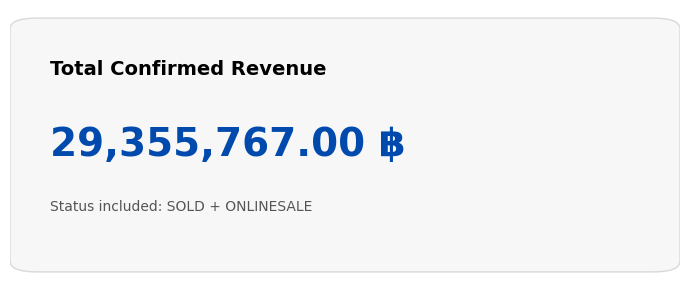

In [ ]:
def query_to_df(sql, params=None):
    cur = conn.cursor()
    cur.execute(sql, params or ())
    rows = cur.fetchall()
    cols = [d[0] for d in cur.description]
    cur.close()
    return pd.DataFrame(rows, columns=cols)

sql = f"""
SELECT
  SUM(COALESCE(CAST(f_price AS DECIMAL(18,2)),0)
      * COALESCE(CAST(f_no_seats AS SIGNED),0)) AS total_confirmed_revenue
FROM dataset_mini_hackathon_2025
WHERE f_ticket_status IN ('SOLD','ONLINESALE');
"""
df = query_to_df(sql)
display(df)

value = float(df.iloc[0, 0] or 0)

fig, ax = plt.subplots(figsize=(7, 3))
ax.set_axis_off()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

card = FancyBboxPatch(
    (0.02, 0.05), 0.96, 0.90,
    boxstyle="round,pad=0.02,rounding_size=0.04",
    linewidth=1.0, edgecolor="#D9D9D9", facecolor="#F7F7F7"
)
ax.add_patch(card)

ax.text(0.06, 0.78, "Total Confirmed Revenue",
        ha="left", va="center", fontsize=14, fontweight="bold")

ax.text(0.06, 0.50, f"{value:,.2f} ฿",
        ha="left", va="center", fontsize=28, fontweight="bold", color="#004AAD")

ax.text(0.06, 0.27, "Status included: SOLD + ONLINESALE",
        ha="left", va="center", fontsize=10, color="#555555")

plt.tight_layout()
plt.show()

2. รายได้แยกตามสถานะหรือวิธีขาย (Revenue Breakdown by Status) (แยกยอดขายตามสถานะตั๋ว เช่น SOLD, ONLINESALE)

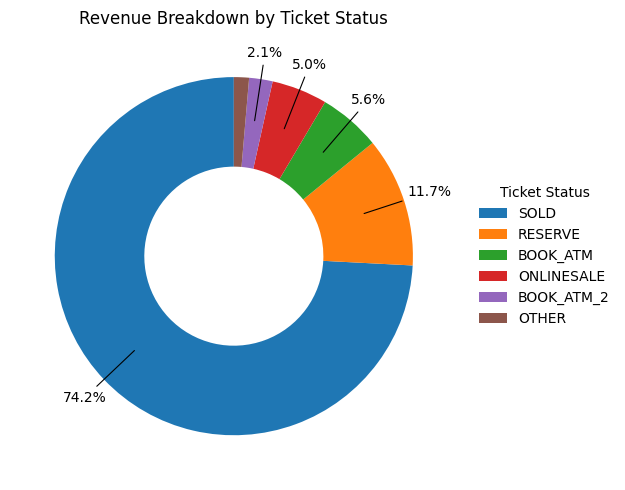

,f_ticket_status,revenue
0,SOLD,27491576.0
1,RESERVE,4346144.0
2,BOOK_ATM,2072068.0
3,ONLINESALE,1864191.0
4,BOOK_ATM_2,785372.0
5,OTHER,504988.0


In [ ]:
def query_to_df(sql, params=None):
    cur = conn.cursor()
    cur.execute(sql, params or ())
    rows = cur.fetchall()
    cols = [d[0] for d in cur.description]
    cur.close()
    return pd.DataFrame(rows, columns=cols)

sql = f"""
SELECT
  f_ticket_status,
  SUM(COALESCE(CAST(f_price AS DECIMAL(18,2)),0) * COALESCE(CAST(f_no_seats AS SIGNED),0)) AS revenue
FROM dataset_mini_hackathon_2025
GROUP BY f_ticket_status
ORDER BY revenue DESC;
"""
df = query_to_df(sql).copy()
df["revenue"] = df["revenue"].astype(float)
df = df.sort_values("revenue", ascending=False).reset_index(drop=True)


max_slices = 6
if len(df) > max_slices:
    top = df.iloc[:max_slices-1].copy()
    other_sum = df.iloc[max_slices-1:]["revenue"].sum()
    df_plot = pd.concat(
        [top, pd.DataFrame([{"f_ticket_status": "OTHER", "revenue": other_sum}])],
        ignore_index=True
    )
else:
    df_plot = df

labels = df_plot["f_ticket_status"].astype(str).tolist()
sizes  = df_plot["revenue"].tolist()
total  = sum(sizes) if len(sizes) else 0.0


fig, ax = plt.subplots(figsize=(7, 5))
wedges, _ = ax.pie(
    sizes,
    wedgeprops=dict(width=0.5),
    startangle=90
)
ax.set(aspect="equal")
plt.title("Revenue Breakdown by Ticket Status")


if total > 0:
    for i, w in enumerate(wedges):
        ang = (w.theta2 + w.theta1) / 2.0
        x = np.cos(np.deg2rad(ang))
        y = np.sin(np.deg2rad(ang))
        pct = sizes[i] / total * 100.0

        if pct < 2:
            continue
        ax.annotate(
            f"{pct:.1f}%",
            xy=(x*0.75, y*0.75),
            xytext=(x*1.15, y*1.15),
            arrowprops=dict(arrowstyle="-", lw=0.8),
            ha="center", va="center", fontsize=10
        )

ax.legend(
    wedges, labels, title="Ticket Status",
    loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False
)

plt.tight_layout()
plt.show()

display(df_plot)

3. รายได้รายวัน (Revenue Over Time (Daily))

      EventDate TotalRevenue_All_Status  TotalTickets_All_Status
0    2024-11-01               177494.00                      614
1    2024-11-02               158234.00                      543
2    2024-11-03               171150.00                      567
3    2024-11-04               128636.00                      435
4    2024-11-05               105732.00                      380
..          ...                     ...                      ...
329  2025-09-26                77746.00                      312
330  2025-09-27                90398.00                      350
331  2025-09-28               101357.00                      383
332  2025-09-29               101890.00                      371
333  2025-09-30                91638.00                      334

[334 rows x 3 columns]


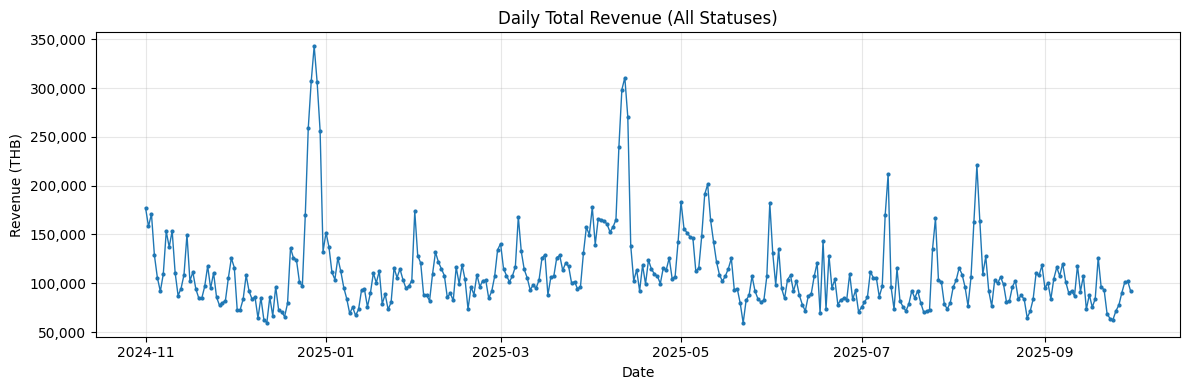

In [ ]:
sql = """
SELECT
    CAST(f_date AS DATE) AS EventDate,
    SUM(CAST(f_price AS DECIMAL(18, 2)) * f_no_seats) AS TotalRevenue_All_Status,
    COUNT(f_ticket_id) AS TotalTickets_All_Status
FROM
    dataset_mini_hackathon_2025
GROUP BY
    CAST(f_date AS DATE)
ORDER BY
    EventDate ASC;;
"""

cursor.execute(sql)
rows = cursor.fetchall()
column_names = [i[0] for i in cursor.description]

df_daily_total = pd.DataFrame(rows, columns=column_names)
print(df_daily_total)

# กราฟ: รายได้ต่อวัน
df_daily_total["EventDate"] = pd.to_datetime(df_daily_total["EventDate"])
df_daily_total["TotalRevenue_All_Status"] = pd.to_numeric(
    df_daily_total["TotalRevenue_All_Status"], errors="coerce"
).fillna(0)

plt.figure(figsize=(12, 4))
plt.plot(
    df_daily_total["EventDate"],
    df_daily_total["TotalRevenue_All_Status"],
    marker="o", markersize=2, linewidth=1
)
plt.title("Daily Total Revenue (All Statuses)")
plt.xlabel("Date")
plt.ylabel("Revenue (THB)")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))  # ใส่คอมม่า
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# `🔷 Operational Health & Leaks (เจาะลึกจุดรั่วไหล)`
###**เป้าหมาย:** ทำความเข้าใจว่าเราเสียโอกาสตรงไหน โดยเน้นที่ธุรกรรมที่อาจ "ไม่สำเร็จ"
###(สถานะ `BOOK_ATM_2` / `BOOK_CASH` / `BOOK_ATM` / `BOOK_TEL` / `BOOK` / `RESERVE`)
1. มูลค่ารายได้ที่อาจเสียไป (Potential Lost Revenue)

In [ ]:
sql = """
SELECT
    SUM(CAST(f_price AS DECIMAL(18, 2)) * f_no_seats) AS PotentialLostRevenue
FROM
    dataset_mini_hackathon_2025
WHERE
    f_ticket_status IN (
        'BOOK_ATM_2', 'BOOK_CASH', 'BOOK_ATM',
        'BOOK_TEL', 'BOOK', 'RESERVE'
    );
"""

cursor.execute(sql)
rows = cursor.fetchall()
column_names = [i[0] for i in cursor.description]

df_lost = pd.DataFrame(rows, columns=column_names)
print(df_lost)

  PotentialLostRevenue
0           7694768.00


2. แนวโน้มการจองและอาจยังไม่ชำระเงิน (Pending Booking Trend)

In [ ]:
sql = """
SELECT
    CAST(f_date AS DATE) AS EventDate,
    COUNT(f_ticket_id) AS FailedBookingCount
FROM dataset_mini_hackathon_2025
WHERE f_ticket_status IN (
    'BOOK_ATM_2', 'BOOK_CASH', 'BOOK_ATM',
    'BOOK_TEL', 'BOOK', 'RESERVE')
GROUP BY CAST(f_date AS DATE)
ORDER BY EventDate ASC;
"""

cursor.execute(sql)
rows = cursor.fetchall()
column_names = [i[0] for i in cursor.description]

df_failBooking = pd.DataFrame(rows, columns=column_names)
print(df_failBooking)

      EventDate  FailedBookingCount
0    2024-11-01                 120
1    2024-11-02                 122
2    2024-11-03                  79
3    2024-11-04                  68
4    2024-11-05                  47
..          ...                 ...
329  2025-09-26                 108
330  2025-09-27                  87
331  2025-09-28                  78
332  2025-09-29                  71
333  2025-09-30                  61

[334 rows x 2 columns]


3. อัตราการจองที่อาจยังไม่ชำระเงิน (Pending Rate)

In [ ]:
sql = """
SELECT
    SUM(CASE WHEN f_ticket_status IN ('BOOK_ATM_2', 'BOOK_CASH', 'BOOK_ATM', 'BOOK_TEL', 'BOOK', 'RESERVE') THEN 1 ELSE 0 END) AS PendingCount,
    COUNT(f_ticket_id) AS TotalCount,
    (SUM(CASE WHEN f_ticket_status IN ('BOOK_ATM_2', 'BOOK_CASH', 'BOOK_ATM', 'BOOK_TEL', 'BOOK', 'RESERVE') THEN 1 ELSE 0 END) * 100) / COUNT(f_ticket_id) AS PendingRatePercentage
FROM dataset_mini_hackathon_2025
WHERE HOUR(f_time) < 24;
"""

cursor.execute(sql)
rows = cursor.fetchall()
column_names = [i[0] for i in cursor.description]
df_4 = pd.DataFrame(rows, columns=column_names)

print(df_4)

  PendingCount  TotalCount PendingRatePercentage
0        26159      131079               19.9567


4. อัตราการจองที่อาจยังไม่ชำระเงิน รายชั่วโมง (Pending Booking by Hour)

In [ ]:
sql = """
SELECT
    HOUR(f_time) AS BookingHour,
    COUNT(f_ticket_id) AS TotalTickets,
    SUM(CASE WHEN f_ticket_status IN ('BOOK_ATM_2', 'BOOK_CASH', 'BOOK_ATM', 'BOOK_TEL', 'BOOK', 'RESERVE') THEN 1 ELSE 0 END) AS AbandonedTickets,
    (SUM(CASE WHEN f_ticket_status IN ('BOOK_ATM_2', 'BOOK_CASH', 'BOOK_ATM', 'BOOK_TEL', 'BOOK', 'RESERVE') THEN 1 ELSE 0 END) * 100.0) / COUNT(f_ticket_id) AS HourlyAbandonmentRate
FROM dataset_mini_hackathon_2025
WHERE HOUR(f_time) < 24
GROUP BY BookingHour
ORDER BY BookingHour;
"""

cursor.execute(sql)
rows = cursor.fetchall()
column_names = [i[0] for i in cursor.description]
df_5 = pd.DataFrame(rows, columns=column_names)

print(df_5)

    BookingHour  TotalTickets AbandonedTickets HourlyAbandonmentRate
0             0            22                0               0.00000
1             1            19                0               0.00000
2             5           133               32              24.06015
3             6          3380             1907              56.42012
4             7          5667              103               1.81754
5             8         19791             4531              22.89424
6             9         13498             2965              21.96622
7            10         14153             1591              11.24143
8            11          8986             1141              12.69753
9            12         15800             3508              22.20253
10           13         11669             1958              16.77950
11           14         12565             1961              15.60684
12           15         10195             2458              24.10986
13           16          6490     

5. อัตราการจองที่อาจยังไม่ชำระเงิน (Pending Rate (Single Customer))

In [ ]:
sql = """
SELECT
    'Single Customer (1 Seat)' AS CustomerType,
    COUNT(f_ticket_id) AS TotalTickets,
    SUM(CASE WHEN f_ticket_status IN ('BOOK_ATM_2', 'BOOK_CASH', 'BOOK_ATM', 'BOOK_TEL', 'BOOK', 'RESERVE') THEN 1 ELSE 0 END) AS AbandonedTickets,
    (SUM(CASE WHEN f_ticket_status IN ('BOOK_ATM_2', 'BOOK_CASH', 'BOOK_ATM', 'BOOK_TEL', 'BOOK', 'RESERVE') THEN 1 ELSE 0 END) * 100.0) / COUNT(f_ticket_id) AS AbandonmentRate
FROM dataset_mini_hackathon_2025
WHERE f_no_seats = 1
  AND HOUR(f_time) < 24;
"""

cursor.execute(sql)
rows = cursor.fetchall()
column_names = [i[0] for i in cursor.description]
df_6 = pd.DataFrame(rows, columns=column_names)

print(df_6)

               CustomerType  TotalTickets AbandonedTickets AbandonmentRate
0  Single Customer (1 Seat)        114479            21042        18.38066


6. อัตราการจองที่อาจยังไม่ชำระเงิน (Pending Rate (Group Customer))

In [ ]:
sql = """
SELECT
    'Group Customer (>1 Seat)' AS CustomerType,
    COUNT(f_ticket_id) AS TotalTickets,
    SUM(CASE WHEN f_ticket_status IN ('BOOK_ATM_2', 'BOOK_CASH', 'BOOK_ATM', 'BOOK_TEL', 'BOOK', 'RESERVE') THEN 1 ELSE 0 END) AS AbandonedTickets,
    (SUM(CASE WHEN f_ticket_status IN ('BOOK_ATM_2', 'BOOK_CASH', 'BOOK_ATM', 'BOOK_TEL', 'BOOK', 'RESERVE') THEN 1 ELSE 0 END) * 100.0) / COUNT(f_ticket_id) AS AbandonmentRate
FROM dataset_mini_hackathon_2025
WHERE f_no_seats > 1
  AND HOUR(f_time) < 24;
"""

cursor.execute(sql)
rows = cursor.fetchall()
column_names = [i[0] for i in cursor.description]
df_7 = pd.DataFrame(rows, columns=column_names)

print(df_7)

               CustomerType  TotalTickets AbandonedTickets AbandonmentRate
0  Group Customer (>1 Seat)         16600             5117        30.82530


# `🔷 Customer Behavior (พฤติกรรมลูกค้า)`
### **เป้าหมาย:** ทำความเข้าใจพฤติกรรมลูกค้า เพื่อวางแผนการตลาดและการกำหนดราคา
1. ลูกค้าจองล่วงหน้านานแค่ไหน (Bookings by Window)

In [ ]:
SQL = """
SELECT
  window_bucket,
  COUNT(*) AS bookings,
  ROUND(100 * COUNT(*) / (SELECT COUNT(*) FROM dataset_mini_hackathon_2025), 2) AS pct
FROM (
  SELECT
    CASE
      WHEN DATEDIFF(DATE(f_date), STR_TO_DATE(SUBSTRING(CAST(f_ticket_id AS CHAR), 1, 8), '%Y%m%d')) <= 1 THEN '0–1 day'
      WHEN DATEDIFF(DATE(f_date), STR_TO_DATE(SUBSTRING(CAST(f_ticket_id AS CHAR), 1, 8), '%Y%m%d')) BETWEEN 2 AND 7 THEN '2–7 days'
      WHEN DATEDIFF(DATE(f_date), STR_TO_DATE(SUBSTRING(CAST(f_ticket_id AS CHAR), 1, 8), '%Y%m%d')) BETWEEN 8 AND 30 THEN '8–30 days'
      ELSE '>30 days'
    END AS window_bucket
  FROM dataset_mini_hackathon_2025
) b
GROUP BY window_bucket
ORDER BY FIELD(window_bucket, '0–1 day','2–7 days','8–30 days','>30 days');
"""
cursor.execute(SQL)
rows = cursor.fetchall()
column_names = [i[0] for i in cursor.description]
display(pd.DataFrame(rows, columns=column_names))


,window_bucket,bookings,pct
0,0–1 day,125239,95.54
1,2–7 days,4384,3.34
2,8–30 days,1316,1.00
3,>30 days,141,0.11


2. ลูกค้านิยมมากี่คน (Bookings by Party Size)



In [ ]:
SQL = """
SELECT
  f_no_seats AS party_size,
  COUNT(*) AS bookings,
  ROUND(100 * COUNT(*) / (SELECT COUNT(*) FROM dataset_mini_hackathon_2025), 2) AS pct
FROM dataset_mini_hackathon_2025
GROUP BY f_no_seats
ORDER BY bookings DESC, party_size ASC
LIMIT 10;
"""
cursor.execute(SQL)
rows = cursor.fetchall()
column_names = [i[0] for i in cursor.description]
display(pd.DataFrame(rows, columns=column_names))


,party_size,bookings,pct
0,1,114480,87.34
1,2,13381,10.21
2,3,2025,1.54
3,4,575,0.44
4,5,189,0.14
5,13,136,0.10
6,6,103,0.08
7,7,52,0.04
8,12,40,0.03
9,8,34,0.03


3. การใช้จ่ายต่อครั้ง (Spend per Transaction)

In [ ]:
SQL = """
SELECT spend_bucket, bookings, pct
FROM (
  SELECT
    CASE
      WHEN (f_price * f_no_seats) < 200 THEN '<200'
      WHEN (f_price * f_no_seats) >= 200 AND (f_price * f_no_seats) < 400 THEN '200–399'
      WHEN (f_price * f_no_seats) >= 400 AND (f_price * f_no_seats) < 800 THEN '400–799'
      ELSE '>=800'
    END AS spend_bucket,
    COUNT(*) AS bookings,
    ROUND(100 * COUNT(*) / (SELECT COUNT(*) FROM dataset_mini_hackathon_2025), 2) AS pct
  FROM dataset_mini_hackathon_2025
  GROUP BY spend_bucket
) b
ORDER BY
  CASE spend_bucket
    WHEN '<200' THEN 1
    WHEN '200–399' THEN 2
    WHEN '400–799' THEN 3
    WHEN '>=800' THEN 4
    ELSE 5
  END;
"""
cursor.execute(SQL)
rows = cursor.fetchall()
column_names = [i[0] for i in cursor.description]
display(pd.DataFrame(rows, columns=column_names))


,spend_bucket,bookings,pct
0,<200,32781,25.01
1,200–399,84194,64.23
2,400–799,12127,9.25
3,>=800,1978,1.51


4. การใช้จ่ายต่อคน (Spend per Seat)

In [ ]:
SQL = """
SELECT
  ROUND(AVG((f_price * f_no_seats) / NULLIF(f_no_seats,0)), 2) AS avg_spend_per_seat,
  MIN((f_price * f_no_seats) / NULLIF(f_no_seats,0)) AS min_spend_per_seat,
  MAX((f_price * f_no_seats) / NULLIF(f_no_seats,0)) AS max_spend_per_seat
FROM dataset_mini_hackathon_2025;
"""
cursor.execute(SQL)
rows = cursor.fetchall()
column_names = [i[0] for i in cursor.description]
display(pd.DataFrame(rows, columns=column_names))


,avg_spend_per_seat,min_spend_per_seat,max_spend_per_seat
0,240.66,120.000000,1000.000000
